# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,27.482192,4.024658,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [3]:
df = pd.read_csv('df1 (1).csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,27.482192,4.024658,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [5]:
# Ferificando informações da base de dados
df.info()
# não tem missings ou variaveis categoricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

In [13]:
# separando variaveis explicativas e variavel resposta
x = df.drop('mau', axis=1) # variaveis explicativas
y = df['mau'] # variavel resposta (target)


In [14]:
# separando base de treinamento e base de teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [15]:
clf = DecisionTreeClassifier(random_state=100) # objeto com da arvore de decisão
clf.fit(x_train, y_train) # treinando arvore

DecisionTreeClassifier(random_state=100)

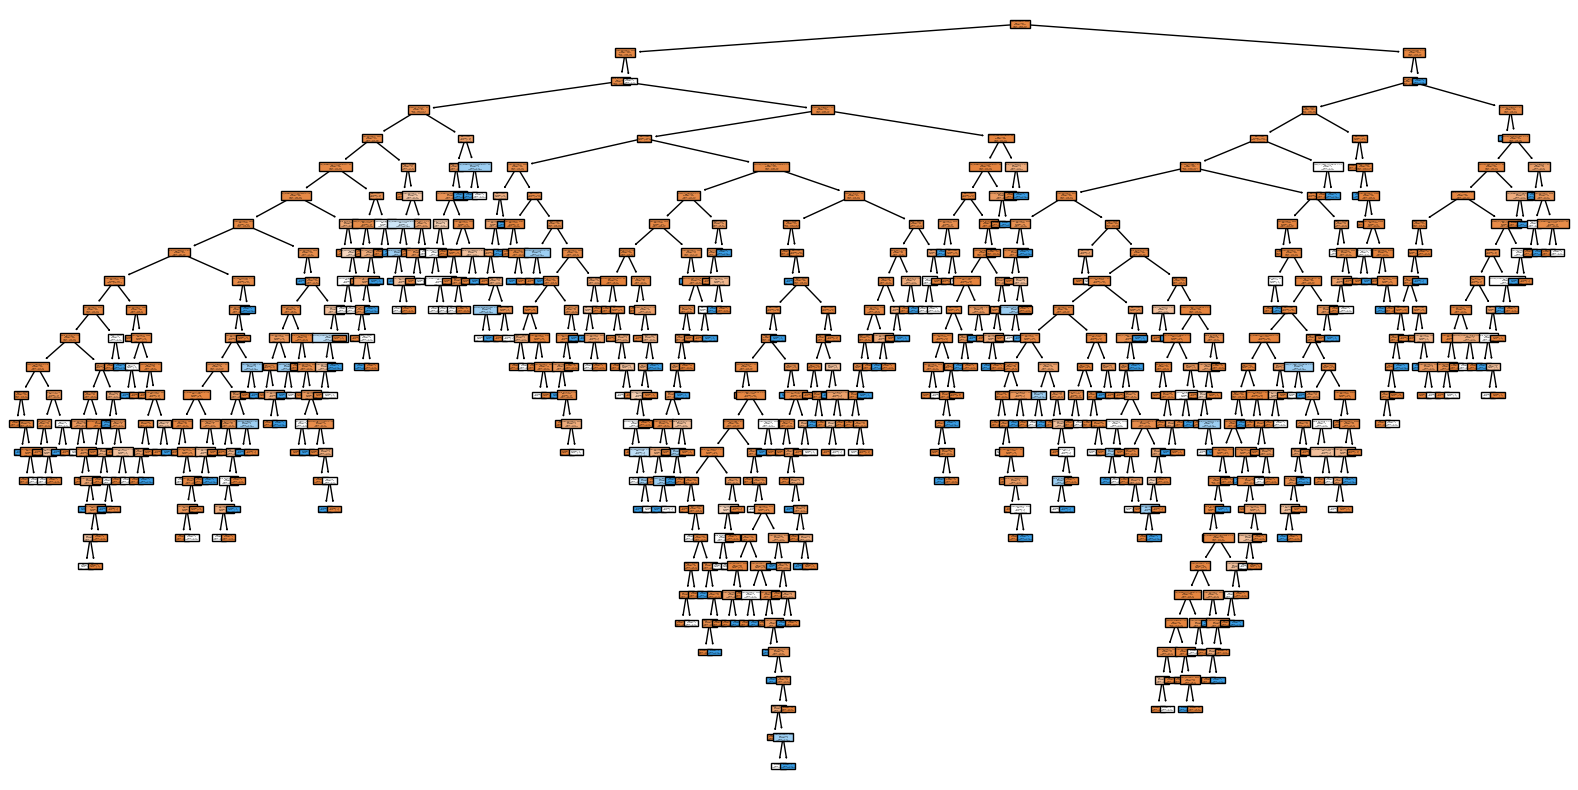

In [23]:
#plot do arvore
plt.figure(figsize=(20,10))
plot_tree(clf,
          class_names=['aprovados', 'reprovados'],
          feature_names=x_train.columns,
          filled=True)
plt.show()

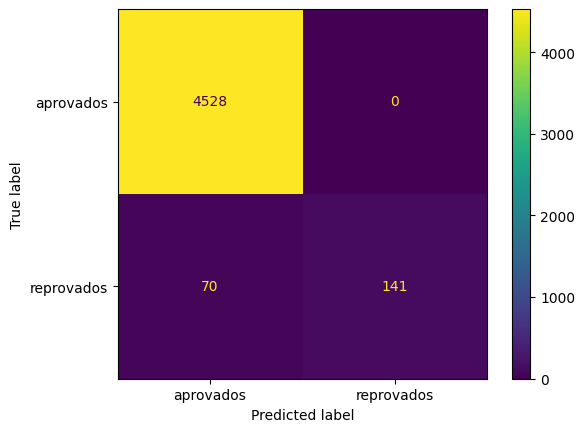

In [25]:
#plot da matriz de confusão
y_pred = clf.predict(x_train)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()
plt.show()

In [28]:
#calculando acuracia
accuracy_score(y_train, y_pred)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [30]:
clf = DecisionTreeClassifier(random_state=100) # objeto com da arvore de decisão
clf.fit(x_test, y_test) # treinando arvore

DecisionTreeClassifier(random_state=100)

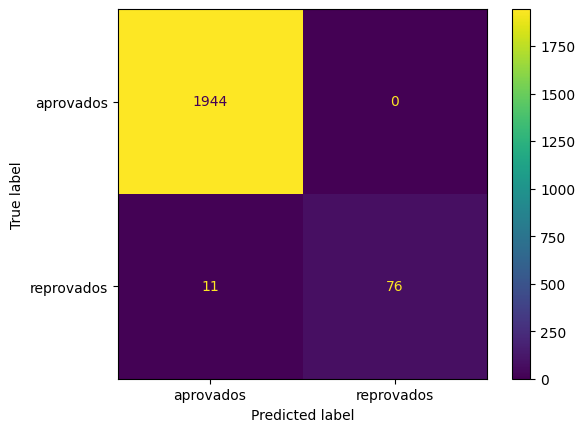

In [32]:
#Matriz de confusão da base de dadso de teste
y_pred_test = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()
plt.show()

In [33]:
acuracia_treinamento = accuracy_score(y_train, y_pred)
acuracia_teste = accuracy_score(y_test, y_pred_test)
print(f'Acurácia da base de treinamento: {acuracia_treinamento}')
print(f'Acurácia da base de teste: {acuracia_teste}')

Acurácia da base de treinamento: 0.9852289512555391
Acurácia da base de teste: 0.9945839487936977


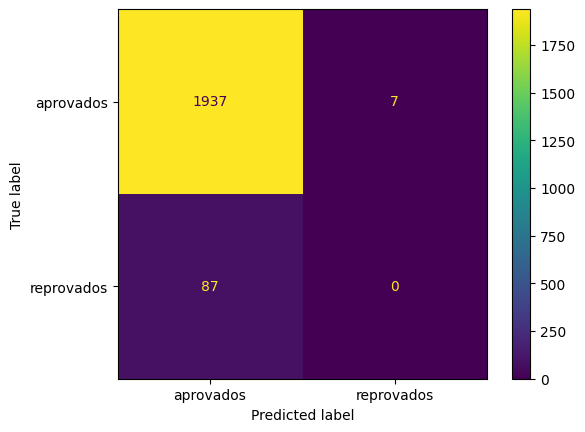

In [36]:
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf2.fit(x_train, y_train)

# Matriz de confusão para a nova árvore
y_pred2 = clf2.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['aprovados', 'reprovados'])
disp2.plot()
plt.show()


In [37]:
#Como y_pred2 contém 0 para "aprovados" e 1 para "reprovados", a média dos valores representa a proporção de "maus".
proporcao_maus = np.mean(y_pred2)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus}")

Proporção de proponentes classificados como 'maus': 0.0034465780403741997


In [40]:
todos_bons = np.zeros(len(y_pred2))

In [42]:
#acuracia de todos como bons
accuracy_score(y_test, todos_bons)

0.9571639586410635